<a href="https://colab.research.google.com/github/RajP-Pandey/Indian-Monument-Detection/blob/main/indian_monuments_cnn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
ls = []
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        ls.append(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/danushkumarv/indian-monuments-image-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rajpandey1102
Your Kaggle Key: ··········


100%|██████████| 621M/621M [00:06<00:00, 98.6MB/s]


In [ ]:
# Necessary Imports
import cv2
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import os
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:

path = "../input/indian-monuments-image-dataset/Indian-monuments/images"

for dirpath, dirnames, filenames in os.walk(path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:

train_dir = "/content/indian-monuments-image-dataset/Indian-monuments/images/train"
test_dir = "/content/indian-monuments-image-dataset/Indian-monuments/images/test"
train_dir

'/content/indian-monuments-image-dataset/Indian-monuments/images/train'

In [ ]:
# get all the class names
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['Ajanta Caves', 'Charar-E- Sharif', 'Chhota_Imambara',
       'Ellora Caves', 'Fatehpur Sikri', 'Gateway of India',
       'Humayun_s Tomb', 'India gate pics', 'Khajuraho',
       'Sun Temple Konark', 'alai_darwaza', 'alai_minar',
       'basilica_of_bom_jesus', 'charminar', 'golden temple',
       'hawa mahal pics', 'iron_pillar', 'jamali_kamali_tomb',
       'lotus_temple', 'mysore_palace', 'qutub_minar', 'tajmahal',
       'tanjavur temple', 'victoria memorial'], dtype='<U21')

In [ ]:

def view_random_image(target_dir, target_class):
    target_folder = target_dir  + target_class

  # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense


train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(300, 300),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(300, 300),
                                              batch_size=32,
                                              class_mode='categorical')

Found 3666 images belonging to 24 classes.
Found 1049 images belonging to 24 classes.


In [ ]:

model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(300, 300, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(24, activation='softmax')
])

In [ ]:
model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=10,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/4
115/115 [==============================] - 51s 404ms/step - loss: 2.4256 - accuracy: 0.3131 - val_loss: 3.1110 - val_accuracy: 0.2555
Epoch 2/4
115/115 [==============================] - 47s 409ms/step - loss: 1.1997 - accuracy: 0.6667 - val_loss: 3.4470 - val_accuracy: 0.3928
Epoch 3/4
115/115 [==============================] - 45s 394ms/step - loss: 0.4598 - accuracy: 0.8805 - val_loss: 4.2591 - val_accuracy: 0.3985
Epoch 4/4
115/115 [==============================] - 58s 509ms/step - loss: 0.1468 - accuracy: 0.9727 - val_loss: 4.6661 - val_accuracy: 0.4194


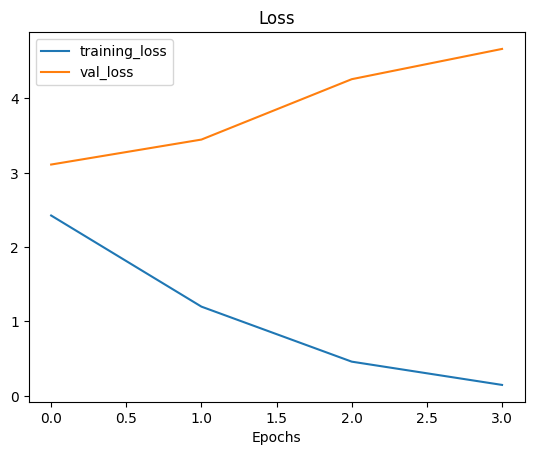

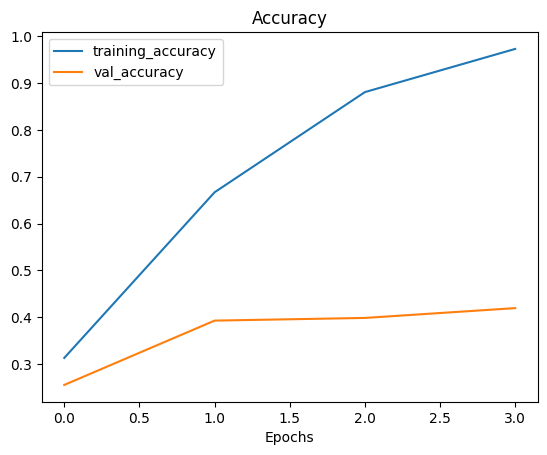

In [ ]:
plot_loss_curves(history_10)

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=300):

  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.

  return img

# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 224ms/step


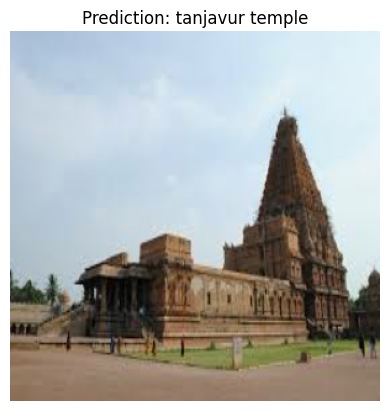

In [ ]:
# make a new prediction
pred_and_plot(model_10, "/content/indian-monuments-image-dataset/Indian-monuments/images/test/tanjavur temple/20.jpeg", class_names)

1/1 [==============================] - 0s 18ms/step


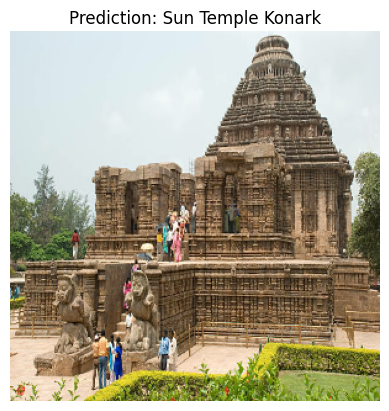

In [ ]:
pred_and_plot(model_10, "/content/indian-monuments-image-dataset/Indian-monuments/images/test/Sun Temple Konark/14.jpg", class_names)

1/1 [==============================] - 0s 22ms/step


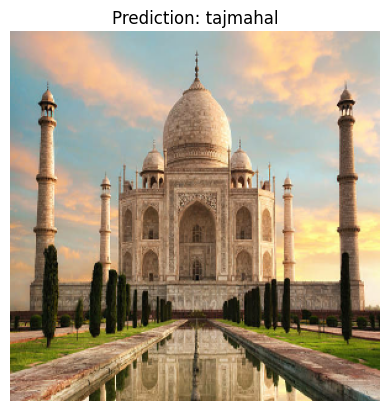

In [ ]:
pred_and_plot(model_10, "/content/indian-monuments-image-dataset/Indian-monuments/images/test/tajmahal/92.jpg", class_names)

1/1 [==============================] - 0s 17ms/step


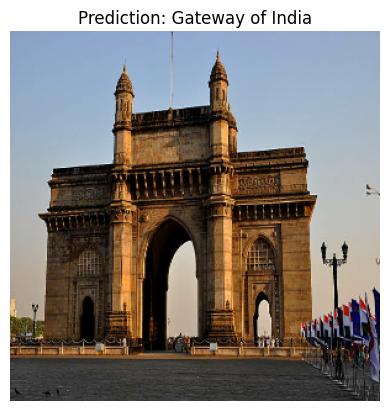

In [ ]:
pred_and_plot(model_10, "/content/indian-monuments-image-dataset/Indian-monuments/images/test/Gateway of India/150.jpg", class_names)

In [ ]:
# save the model
model_10.save("saved_trained_model")

In [ ]:
model_10.save('my_combined_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import zipfile
import os

# Directory containing the saved model file
directory = "/content/saved_trained_model"

# Zip file name
zip_file_name = "/content/saved_trained_model.ZIP"

# Create a Zip file
with zipfile.ZipFile(zip_file_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(directory):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), directory))

# Output the path to the generated zip file
print("Model saved as a zip:", zip_file_name)


Model saved as a zip: /content/saved_trained_model.ZIP


1/1 [==============================] - 0s 57ms/step


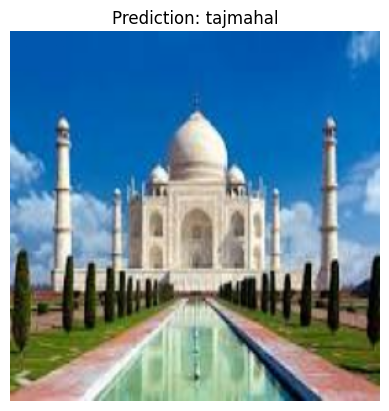

In [ ]:

new_model = tf.keras.models.load_model("saved_trained_model")
pred_and_plot(new_model,"/content/download.jpg", class_names)
